## Health Insurance Prediction

### Exploratory Data Analysis

### Summary

This is **Part 1** of the project **Health Insurance Prediction: Exploratory Data Analysis**.

In this project I analyse <a href="https://https://www.kaggle.com/datasets/mirichoi0218/insurance">Medical Cost Personal</a>
dataset from <a href='https://www.kaggle.com/'>Kaggle</a>. 

The analysis covers **data visualization**, **feature engineering** and **building a linear regression model** to 
**predict insurance costs**.

It is primarily based in Python, using Numpy and Pandas for data manipulation, Matplotlib and Seaborn for visualizations and 
sklearn for building the machine leaning models.

### About Dataset

The **Insurance** dataset has **1338 observations and 7 attributes** and contains medical personal costs billed by a health 
insurance company. The data was extracted from online datasets available for the book "Machine Learning with R" by Brett Lantz.


#### Attribute information

- **age:** Age of primary beneficiary
- **sex:** Insurance contractor gender, female, male
- **bmi:** Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load data

In [2]:
# Retrieve data in a pandas dataframe
insurance = pd.read_csv('insurance.csv')

# Print the shape and the first rows
print(insurance.shape, "\n")
insurance.head()

(1338, 7) 



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Get columns info

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset has four numerical and three categorical columns.

### Descriptive statistics

In [4]:
insurance.describe().style.format("{:.2f}")

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


The beneficiaries’ gender and region are evenly distributed, having their age ranging from 18 to 64 years old. The bmi has a 
minim of 16 and a maximum of 54. Non-smokers outnumber smokers 4 to 1. 

The average medical cost is USD 13,270, higher than the median value of USD 9382, indicating a right skewed distribution.

In [5]:
# Make a copy of dataframe
insurance1 = insurance.copy()

## Data Visualization

### How smoking affects the relationship between BMI and insurance costs?

We'll plot first the distributions of the insurance charges and the distribution of body mass index (BMI).

Text(0.5, 1.0, 'Distribution of Insurance charges in $log$ scale')

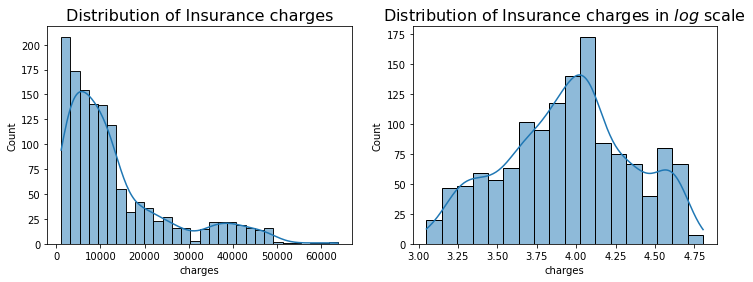

In [6]:
# Create the figure and subplots
f= plt.figure(figsize=(12,4))

# Histogram of charges
ax=f.add_subplot(121)
sns.histplot(insurance['charges'],         
             ax=ax, kde=True)
ax.set_title('Distribution of Insurance charges', 
             fontsize=16)

# Histogram of log charges
ax=f.add_subplot(122)
sns.histplot(x=np.log10(insurance['charges']), 
             kde=True) 
ax.set_title('Distribution of Insurance charges in $log$ scale', 
             fontsize=16)

The distribution of **insurance costs** is **skewed to the right**. The charges vary from 1120 to 63500.

In the right plot it's applied the natural log to 'charges', and we observe that the distribution is close to normal.

Text(0.5, 1.0, 'Boxplot of BMI')

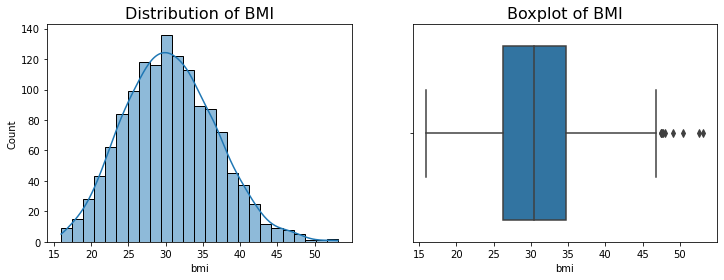

In [7]:
# Create the figure and subplots
f= plt.figure(figsize=(12,4))

# Histogram of bmi
ax=f.add_subplot(121)
sns.histplot(data=insurance, x='bmi', 
             kde=True)
ax.set_title('Distribution of BMI', 
             fontsize=16)

# Boxplot of bmi
ax=f.add_subplot(122)
sns.boxplot(data=insurance, 
            x="bmi")
ax.set_title('Boxplot of BMI', 
             fontsize=16)

The histogram shows that 'bmi' has a relatively normal distribution, aside from the extreme values. 

We can see the **outliers** as dots in the **boxplot on the right**.

We will use next the lmplot (linear model plot) to help us examine the linear relationship between BMI and insurance charges 
and perform a linear regression between the two.

Text(0.5, 1.0, 'Insurance charges vs BMI and Smoker status')

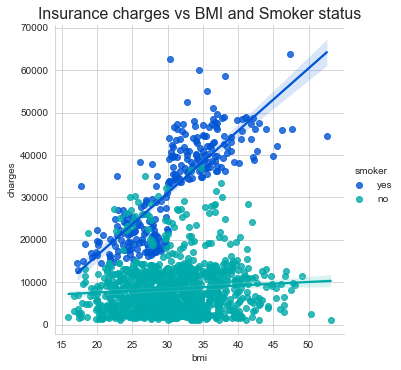

In [8]:
# Set seaborn style
sns.set_style('whitegrid')

# Plot charges vs bmi and smoker
sns.lmplot(data=insurance, x="bmi", 
           y="charges", hue="smoker", palette='winter')
plt.title('Insurance charges vs BMI and Smoker status', 
          fontsize=16)

The scatterplot above suggests that **BMI and insurance charges** are **positively correlated**.

We observe that **customers** with **higher BMI** tend to **pay more in insurance costs**, which makes sense 
since high BMI is typically associated with higher risk of chronic disease. The **regression lines** added to the plot show 
the **strength of this relationship**. 

To understand **how smoking affects** the relationship between **BMI and insurance costs**, we added **color-code** points, 
corresponding to smokers and nonsmokers. 

We notice that the **regression line** for **smokers** has a much **steeper slope**, **relative** to the line for 
**nonsmokers**. 

While **nonsmokers** tend to **pay slightly more** with **increasing BMI**, **smokers** pay **much more**.

### How are the insurance costs influenced by age, gender, and smoking?

Text(0.5, 1.0, 'Insurance charges vs Age and Smoker status')

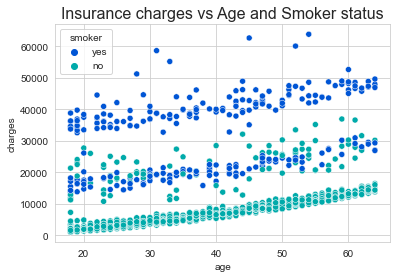

In [9]:
# Scatterplot of charges vs age and smoker
sns.scatterplot(x='age', y='charges',
                data=insurance, 
                palette='winter', 
                hue='smoker')
plt.title('Insurance charges vs Age and Smoker status', 
          fontsize=16)

We notice that **insurance costs increase** with **age** for **both non-smokers and smokers**.

The **charges start** from a much **lower level** for **non-smokers** (300) **than** for **smokers** (1700).

Text(0.5, 1.0, 'Insurance charges vs sex')

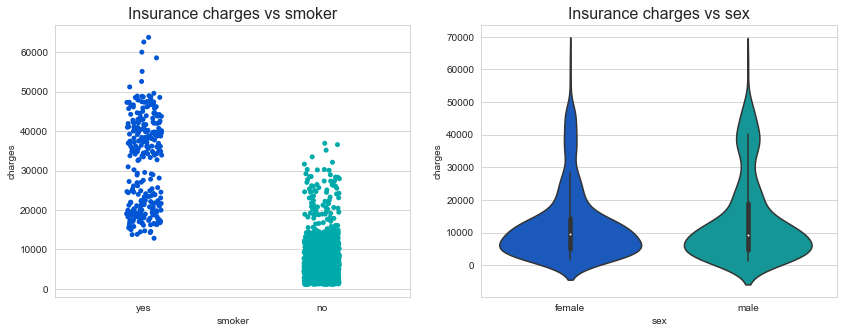

In [10]:
# Create the figure and subplots
f = plt.figure(figsize=(14,5))

# Plot charges vs smoker
ax = f.add_subplot(121)
sns.stripplot(x=insurance['smoker'], 
              y=insurance['charges'],
             palette='winter')
ax.set_title('Insurance charges vs smoker', 
             fontsize=16)

# Plot charges vs sex
ax = f.add_subplot(122)
sns.violinplot(x='sex', y='charges',
               data=insurance, 
               palette='winter', 
               ax=ax)
ax.set_title('Insurance charges vs sex', 
             fontsize=16)

The **plot on the left** shows that the **customers** who **pay the most** are the **smokers**, whereas the **non-smokers**
**pay the least**. 

The **insurance charges** for **smokers** start at a **higher value** and have a **wider range**, **compared to non-smokers**. 

The **plot on the right** indicates **no significant difference** in charges **between males and females**. The number of
males smokers are slightly higher than female smokers.

### Are the insurance charges influenced by the number of dependents or region?

Text(0.5, 1.0, 'Insurance charges vs Children and Smoker status')

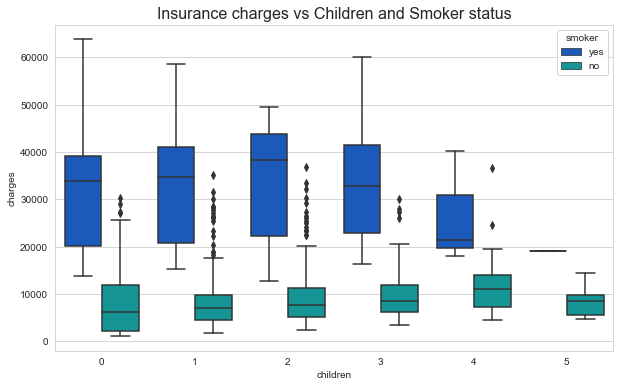

In [11]:
# Boxplot of charges vs children and smoker
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.boxplot(x = 'children', 
                 y = 'charges', 
                 data=insurance,
                 hue='smoker', 
                 palette='winter')  
plt.title('Insurance charges vs Children and Smoker status', 
          fontsize=16)

The **insurance costs** are **higher** for **smokers** also when they have **children**. 

We observe that **people who have children** generally **smoke less**. 

Text(0.5, 1.0, 'Insurance charges by Region')

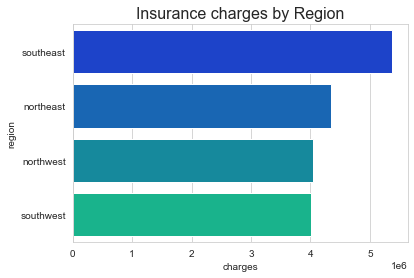

In [12]:
# Group charges by region
reg_charges =insurance.groupby("region").sum()\
          ["charges"].sort_values(ascending=False)

# Plot charges by region
sns.barplot(x=reg_charges[:10], 
            y=reg_charges[:10].index,
            palette="winter")
plt.title('Insurance charges by Region', 
          fontsize=16)

The **insurance costs** are **similar for all regions**, slightly higher for southeast.

We can **conclude** that **smoking** has the **highest impact** on **insurance charges**, with costs **increasing with 
bmi and age**. 

### Conclusions

**Data visualization** allowed exploring the relationships between health insurance costs and several factors like age, 
health status (body mass index, smoking), gender, family size, and region. 

The main takeaway of the analysis is that **smoking has the highest impact on insurance charges**. Costs also **increase with 
BMI and age**. Insurance charges get **higher also for non-smokers** depending on **age, BMI**, and family size. 